<a href="https://colab.research.google.com/github/emnjunior/TCC/blob/main/TCC_TesouroDireto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Python para Investimentos - Tesouro Direto

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

**Canal no Youtube:** https://www.youtube.com/ricospeloacaso?sub_confirmation=1

---


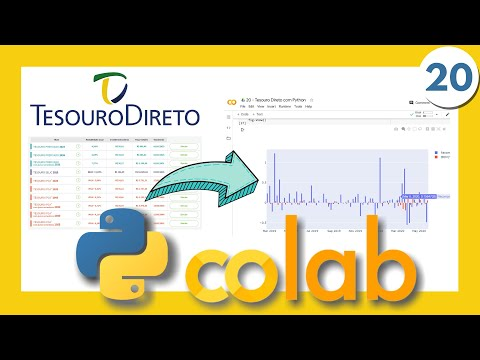

In [ ]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('U3zuklVH6k4', width=854, height=480)

##Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

##Importações e Configurações Iniciais

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import seaborn as sns # Statistical data visualization

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
!pip install yfinance
!pip install investpy
!pip install quandl 
!pip install pycaret

import yfinance as yf

import investpy as inv


import ssl
ssl._create_default_https_context = ssl._create_unverified_context


     |████████████████████████████████| 5.5MB 6.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=6cab0d172579f1d9bf27d8fe6cf78bd82b958f78a190f6b517f97a15f4472f07
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 4.4MB 5.1MB/s 
     |████████████████████████████████| 245kB 43.4MB/s 
     |████████████████████████████████| 512kB 44.0MB/s 
  Created wheel for investpy: filename=investpy-1.0.2-cp36-none-any.whl size=4466765 sha256=cc320aac747bd87c0047271460969d64064a5e41628df81d0010c7f065d5a3fb
  Stored in directory: /root/.cache/pip/wheels/a3/36/72/713ce416550c4edcd337b819c6dc3aeabe60bfcf6b463065c8
Successfully built investpy
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      

     |████████████████████████████████| 256kB 4.2MB/s 
     |████████████████████████████████| 102kB 5.9MB/s 
     |████████████████████████████████| 14.2MB 322kB/s 
     |████████████████████████████████| 65.8MB 63kB/s 
     |████████████████████████████████| 276kB 37.2MB/s 
     |████████████████████████████████| 1.7MB 35.7MB/s 
     |████████████████████████████████| 1.8MB 49.1MB/s 
     |████████████████████████████████| 6.8MB 41.5MB/s 
     |████████████████████████████████| 157.5MB 78kB/s 
     |████████████████████████████████| 174kB 38.4MB/s 
     |████████████████████████████████| 245kB 48.9MB/s 
     |████████████████████████████████| 2.1MB 38.6MB/s 
     |████████████████████████████████| 348kB 43.3MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 163kB 54.6MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 153kB 38.0MB/s 

##1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [ ]:
data_inicio = '01/01/2016'
data_fim = '31/12/2020'

def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

def busca_titulos_tesouro_direto_semindice():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  #multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  #df = df.set_index(multi_indice).iloc[: , 3:]  
  return df



In [ ]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

def busca_vendas_tesouro_semindice():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  #multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  #df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [ ]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [ ]:
def busca_taxa_selic():
  import quandl
  quandl.ApiConfig.api_key = 'Je_yMy-FtXRsgpwAMxmn'
  selic = quandl.get('BCB/432', start_date=data_inicio)
  return selic


def busca_taxa_ipca():
  import quandl
  quandl.ApiConfig.api_key = 'Je_yMy-FtXRsgpwAMxmn'
  ipca = quandl.get('BCB/13522', start_date=data_inicio)
  return ipca

,Value
Date,
2016-01-31,10.71
2016-02-29,10.36
2016-03-31,9.39
2016-04-30,9.28
2016-05-31,9.32
2016-06-30,8.84
2016-07-31,8.74
2016-08-31,8.97
2016-09-30,8.48


In [ ]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


def return_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)]
    return df_out


# Função para plotar o Boxplot
def plotar_boxplot(df, coluna):
  # import pandas
  import pandas as pd
  # import seaborn
  import seaborn as sns
  %matplotlib inline
   
  df.boxplot(column=coluna, grid=False)
 

#Fazer uma função para imprimir o grafico de Vendas x Taxa normalizado
def plotar_grafico_taxa_vendas_normalizado(dfTaxas, dfVendas):
  ((dfTaxas['Taxa Venda Manha'] - dfTaxas['Taxa Venda Manha'].min())/(dfTaxas['Taxa Venda Manha'].max()-dfTaxas['Taxa Venda Manha'].min())).plot();
  ((dfVendas['Valor'] - dfVendas['Valor'].min())/(dfVendas['Valor'].max()-dfVendas['Valor'].min())).plot();
  

##2.Preços e Taxas Históricas dos Títulos Negociados

Essa conjunto de dados contém as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais. 

###2.1 Buscando dados

In [ ]:
titulos = busca_titulos_tesouro_direto()

In [ ]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                        Data Vencimento Data Base                      ...               
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31               9.23  ...        1827.87
                                                   2005-01-03               9.23  ...        1776.51
                                                   2005-01-04               9.26  ...        1777.32
                                                   2005-01-05               9.28  ...        1778.20
                                                   2005-01-06               9.31  ...        1779.01
                                                   2005-01-07               9.87  ...        1775.73
                                                   2005-01-10              10.14  ...        1775.59
                                                   2005-01-11              10.26  ...        1775.79
                                                   2005-01-12              10.89  ...        1771.45
                                                   2005-01-13              10.89  ...        1772.52
...                                                                          ...  ...            ...
Tesouro Selic                      2025-03-01      2021-02-04               0.14  ...       10713.59
                                                   2021-02-05               0.14  ...       10713.94
                                                   2021-02-08               0.14  ...       10713.67
                                                   2021-02-09               0.15  ...       10713.20
                                                   2021-02-10               0.15  ...       10713.24
                                                   2021-02-11               0.15  ...       10713.55
                                   2027-03-01      2021-02-08               0.32  ...       10569.54
                                                   2021-02-09               0.32  ...       10569.64
                                                   2021-02-10               0.32  ...       10567.27
                                                   2021-02-11               0.33  ...       10567.25

[113843 rows x 5 columns]

In [ ]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Selic']

###2.2 Tesouro Selic

In [ ]:
selic2021 = titulos.loc[('Tesouro Selic', '2021-03-01')]
selic2021
selic2023 = titulos.loc[('Tesouro Selic', '2023-03-01')]
selic2023
selic2025 = titulos.loc[('Tesouro Selic', '2025-03-01')]
selic2025


,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
2019-02-08,0.02,0.06,9939.25,9915.26,9912.76
2019-02-11,0.02,0.06,9941.70,9917.72,9915.22
2019-02-12,0.02,0.06,9944.16,9920.19,9917.68
2019-02-13,0.02,0.06,9946.61,9922.65,9920.15


In [ ]:
selic2021

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2015-03-10,0.00,0.04,6677.32,6661.49,6658.31
2015-03-11,0.00,0.04,6680.48,6664.65,6661.46
2015-03-12,0.00,0.04,6683.64,6667.81,6664.63
2015-03-13,0.00,0.04,6686.80,6670.97,6667.78
2015-03-16,0.00,0.04,6689.96,6674.14,6670.95
2015-03-17,0.00,0.04,6693.12,6677.30,6674.12
2015-03-18,0.00,0.04,6696.29,6680.47,6677.28
2015-03-19,0.00,0.04,6699.45,6683.64,6680.45
2015-03-20,0.00,0.04,6702.62,6686.81,6683.61


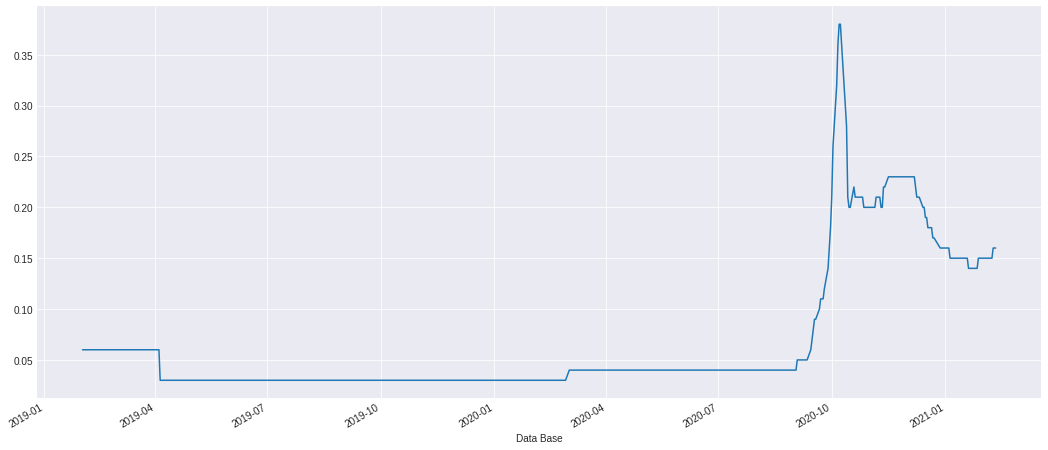

In [ ]:
selic2025['Taxa Venda Manha'].plot();

###2.3 Títulos Pré-fixado com vencimento em 2 anos


In [ ]:
pre2018 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

In [ ]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

#Obter as taxas dos títulos préfixados de 2018 a 2023
#equivalente aos títulos préfixados com vencimento em 2 anos
pre2018 = titulos.loc[('Tesouro Prefixado', '2018-01-01')]
pre2019 = titulos.loc[('Tesouro Prefixado', '2019-01-01')]
pre2020 = titulos.loc[('Tesouro Prefixado', '2020-01-01')]
pre2021 = titulos.loc[('Tesouro Prefixado', '2021-01-01')]
pre2022 = titulos.loc[('Tesouro Prefixado', '2022-01-01')]
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]

#FILTRAR as taxas de cada Título Prefixado de acordo com o tempo que o título foi vendido
pre2018 = pre2018[pre2018.index >= '2016-01-01'] 
pre2018 = pre2018[pre2018.index < '2016-01-28']
pre2019 = pre2019[pre2019.index >= '2016-01-28'] 
pre2019 = pre2019[pre2019.index < '2017-02-10'] 
pre2020 = pre2020[pre2020.index >= '2017-02-10'] 
pre2020 = pre2020[pre2020.index < '2018-02-08'] 
pre2021 = pre2021[pre2021.index >= '2018-02-08'] 
pre2021 = pre2021[pre2021.index < '2019-02-04'] 
pre2022 = pre2022[pre2022.index >= '2019-02-04'] 
pre2022 = pre2022[pre2022.index < '2020-02-11'] 
pre2023 = pre2023[pre2023.index >= '2020-02-11'] 
pre2023 = pre2023[pre2023.index <= '2020-12-31'] 

pre_dois_anos = pd.concat([pre2018,pre2019,pre2020,pre2021,pre2022,pre2023])

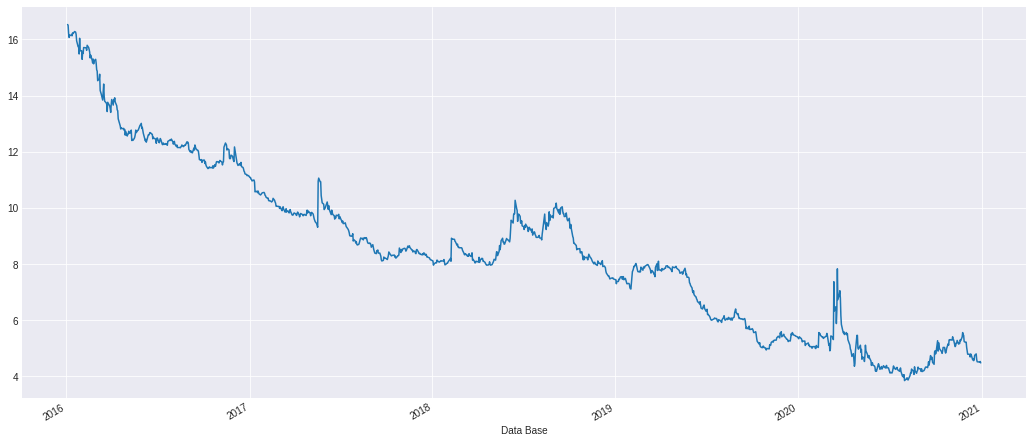

In [ ]:
pre_dois_anos['Taxa Venda Manha'].plot();

###2.7 Tesouro IPCA+ 2035

In [ ]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035 = ipca2035[ipca2035.index >= data_inicio]
ipca2035 = ipca2035[ipca2035.index <= data_fim]
ipca2035

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-04,7.42,7.50,697.94,687.99,687.56
2016-01-05,7.40,7.48,700.87,690.88,690.46
2016-01-06,7.34,7.42,708.90,698.79,698.36
2016-01-07,7.31,7.39,713.16,702.99,702.56
2016-01-08,7.41,7.49,701.00,691.01,690.18
2016-01-11,7.47,7.55,693.91,684.03,683.62
2016-01-12,7.44,7.52,698.06,688.13,687.72
2016-01-13,7.42,7.50,700.98,691.01,690.60
2016-01-14,7.47,7.55,695.14,685.25,684.85


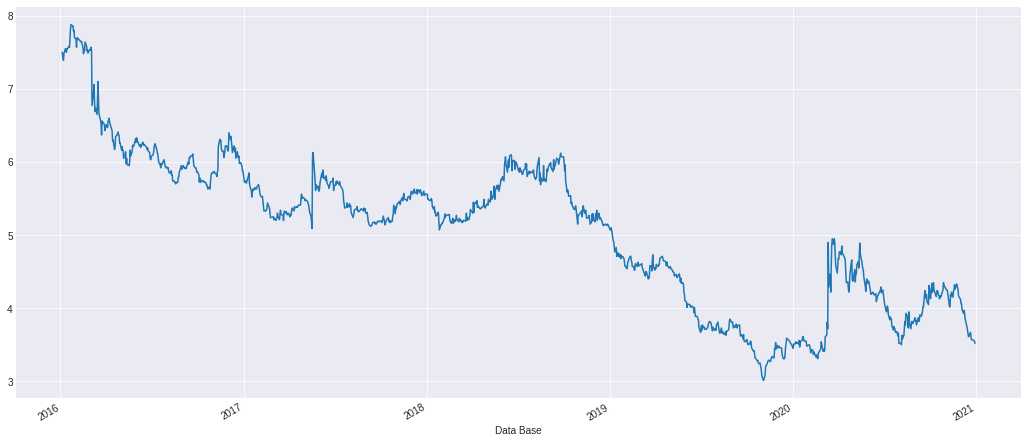

In [ ]:
ipca2035['Taxa Venda Manha'].plot();

###2.10 Buscar a Taxas adicionais para análise:
 * Selic no Banco Central
 * Juros Futuros
 * Ibovespa


In [ ]:
#obter a taxa Selic
selic = busca_taxa_selic()
selic

,Value
Date,
2016-01-01,14.25
2016-01-02,14.25
2016-01-03,14.25
2016-01-04,14.25
2016-01-05,14.25
2016-01-06,14.25
2016-01-07,14.25
2016-01-08,14.25
2016-01-09,14.25


[*********************100%***********************]  1 of 1 completed


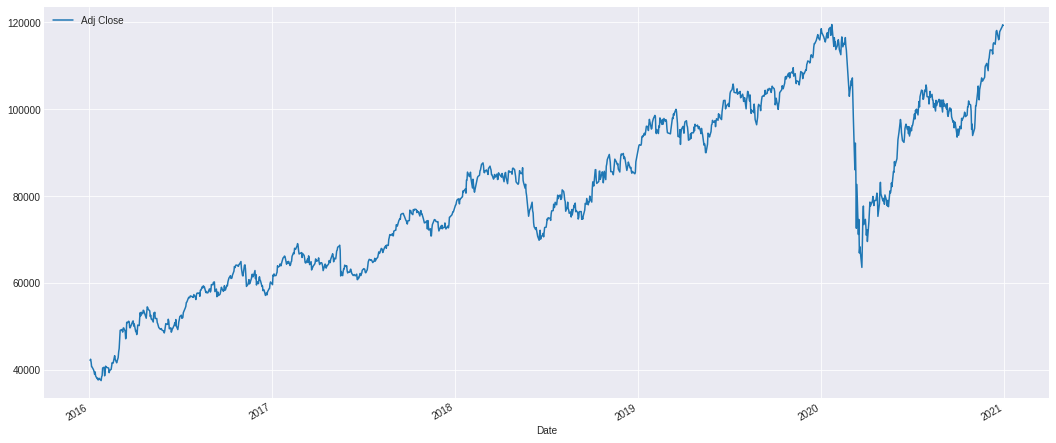

In [ ]:
#obter a taxa do ibovespa
ibov = yf.download('^BVSP')[['Adj Close']]
ibov = ibov[ibov.index >= data_inicio] 
ibov = ibov[ibov.index <= data_fim] 
ibov.plot()



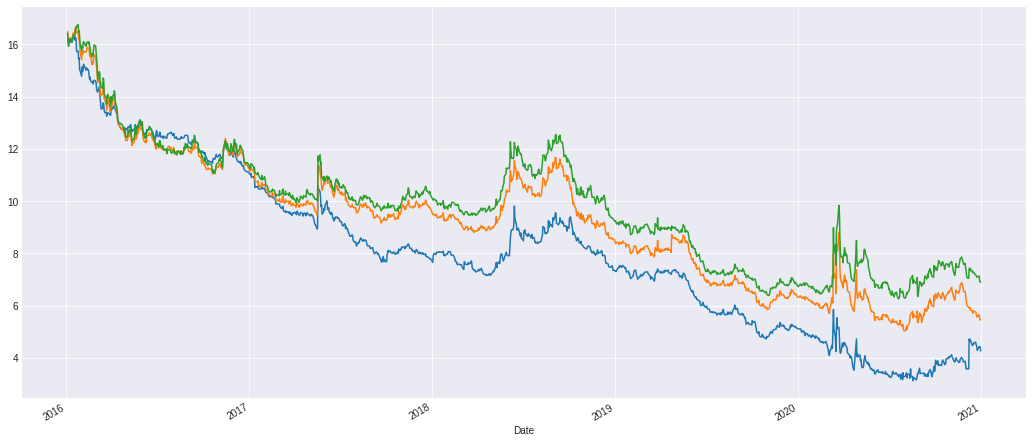

In [ ]:
#obter os dados das taxas de juros futuros - DI de 2, 5 e 10 anos
juros_futuros_dois_anos = inv.get_bond_historical_data('Brazil 2Y', from_date=data_inicio, to_date=data_fim)[['Close']]
juros_futuros_cinco_anos = inv.get_bond_historical_data('Brazil 5Y', from_date=data_inicio, to_date=data_fim)[['Close']]
juros_futuros_dez_anos = inv.get_bond_historical_data('Brazil 10Y', from_date=data_inicio, to_date=data_fim)[['Close']]
juros_futuros_dois_anos['Close'].plot();
juros_futuros_cinco_anos['Close'].plot();
juros_futuros_dez_anos['Close'].plot();

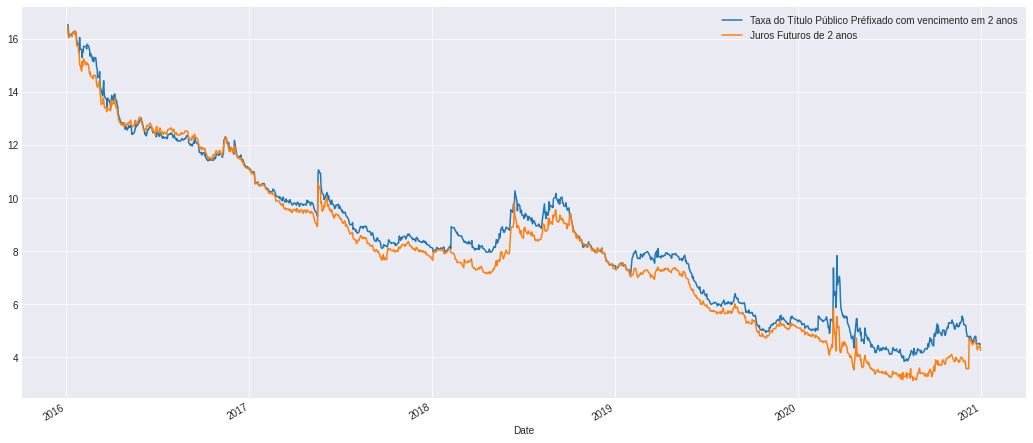

In [ ]:
#Comparar a Taxa dos Títulos PréFixados com vencimento em 2 anos com a Taxa de Juros Futuros
pre_dois_anos['Taxa Venda Manha'].rename("Taxa do Título Público Préfixado com vencimento em 2 anos").plot(legend="reverse");
juros_futuros_dois_anos['Close'].rename("Juros Futuros de 2 anos").plot(legend="reverse");


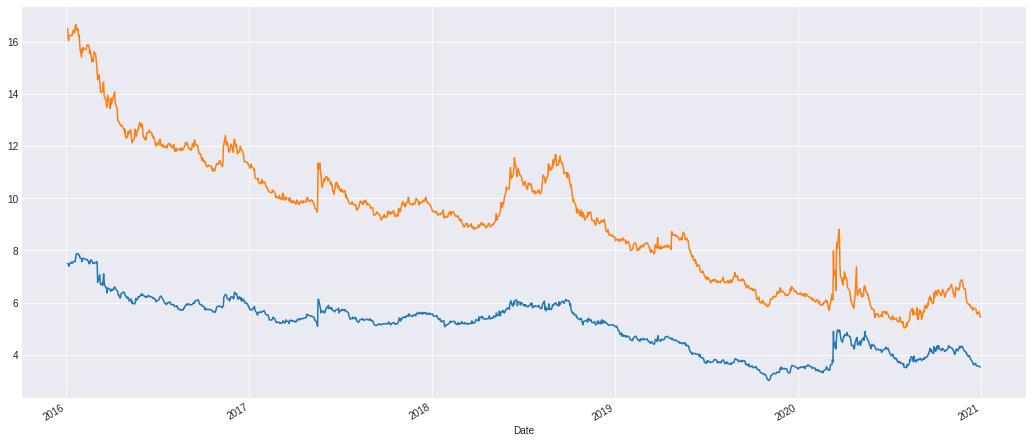

In [ ]:
ipca2035['Taxa Venda Manha'].plot();
juros_futuros_cinco_anos['Close'].plot();

In [ ]:
#Obter os valore das Taxa IPCA de 12 meses
taxaipca = busca_taxa_ipca()
taxaipca['Mes'] = taxaipca.index.month
taxaipca['Ano'] = taxaipca.index.year
taxaipca

,Value,Mes,Ano
Date,,,
2016-01-31,10.71,1,2016
2016-02-29,10.36,2,2016
2016-03-31,9.39,3,2016
2016-04-30,9.28,4,2016
2016-05-31,9.32,5,2016
2016-06-30,8.84,6,2016
2016-07-31,8.74,7,2016
2016-08-31,8.97,8,2016
2016-09-30,8.48,9,2016


In [ ]:
taxaipca['Value'] + ipca2035['Taxa Venda Manha'].resample('M').mean()

2016-01-31    18.336000
2016-02-29    17.949474
2016-03-31    16.193182
2016-04-30    15.678000
2016-05-31    15.440000
2016-06-30    15.041818
2016-07-31    14.796190
2016-08-31    14.796522
2016-09-30    14.454286
2016-10-31    13.599500
                ...    
2020-04-30     6.971500
2020-05-31     6.396500
2020-06-30     6.348571
2020-07-31     6.136087
2020-08-31     6.179524
2020-09-30     7.139048
2020-10-31     8.150000
2020-11-30     8.521000
2020-12-31     8.295500
2021-01-31          NaN
Length: 61, dtype: float64

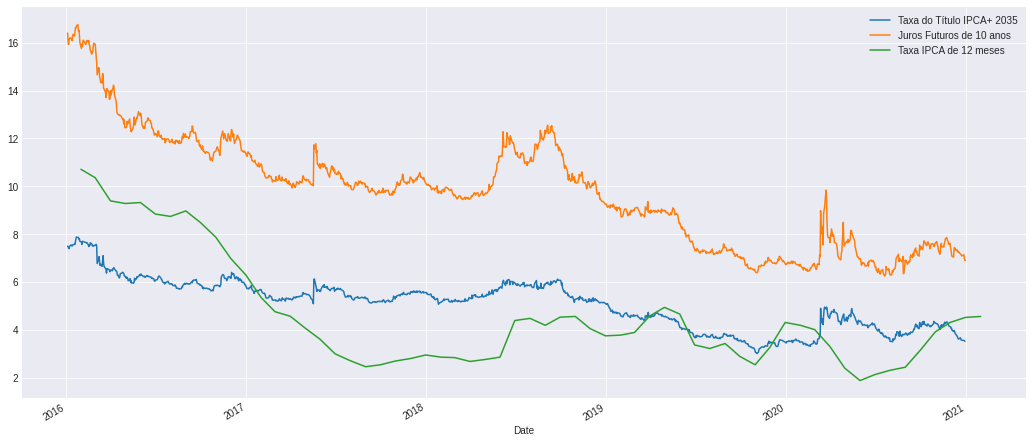

In [ ]:
ipca2035['Taxa Venda Manha'].rename("Taxa do Título IPCA+ 2035").plot(legend="reverse");
juros_futuros_dez_anos['Close'].rename("Juros Futuros de 10 anos").plot(legend="reverse");
taxaipca['Value'].rename("Taxa IPCA de 12 meses").plot(legend="reverse");
#(taxaipca['Value'] + ipca2035['Taxa Venda Manha'].resample('M').mean()).rename("Soma da Taxa do título e do IPCA").plot(legend="reverse") #Taxa do Título IPCA + o valor da Taxa do IPCA de 12 meses

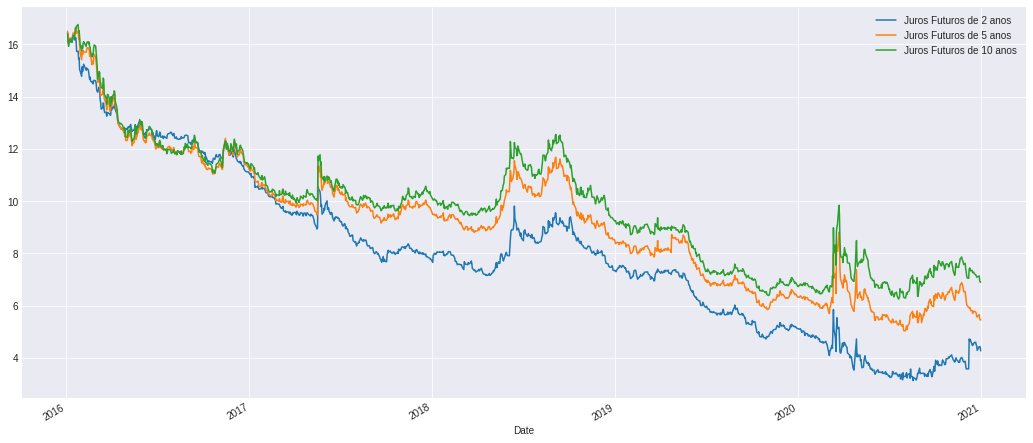

In [ ]:
juros_futuros_dois_anos['Close'].rename("Juros Futuros de 2 anos").plot(legend="reverse");
juros_futuros_cinco_anos['Close'].rename("Juros Futuros de 5 anos").plot(legend="reverse");
juros_futuros_dez_anos['Close'].rename("Juros Futuros de 10 anos").plot(legend="reverse");


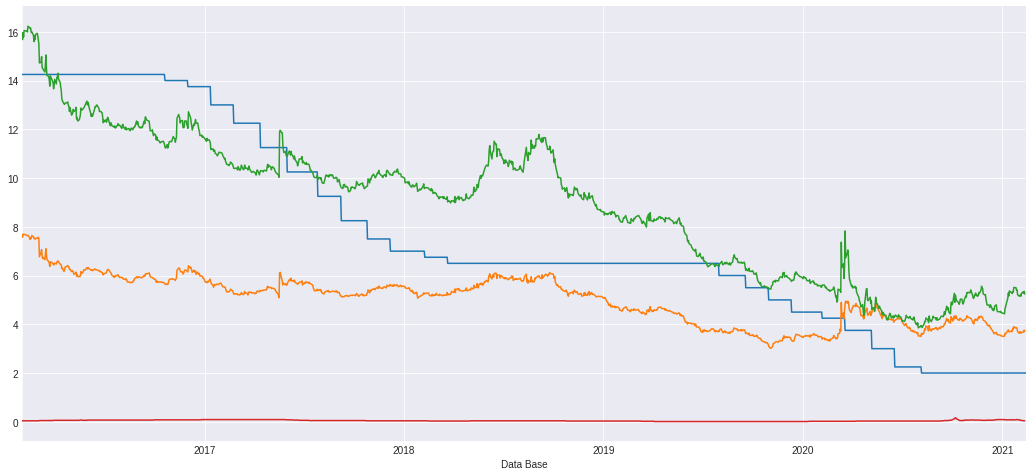

In [ ]:
#filtrar os valores dos títulos do tesouro direto após '2016-02-01'
ipca2035 = ipca2035[ipca2035.index >= '2016-02-01'] 
pre2023 = pre2023[pre2023.index >= '2016-02-01'] 
selic2021 = selic2021[selic2021.index >= '2016-02-01'] 

#Plotar um grafico comparando a Taxa Selic com as Taxas dos Tesouro Direto
selic['Value'].plot();
(ipca2035['Taxa Venda Manha']).plot();
(pre2023['Taxa Venda Manha']).plot();
(selic2021['Taxa Venda Manha']).plot();


##3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto.

###3.1 Buscando Dados

In [ ]:
#vendas = busca_vendas_tesouro()
vendas = busca_vendas_tesouro_semindice()

In [ ]:
vendas

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro IPCA+,2015-05-15,2007-06-19,1029.816852,197.00,202873.91
1,Tesouro IPCA+,2024-08-15,2007-06-19,623.035412,203.60,126850.00
2,Tesouro IPCA+ com Juros Semestrais,2035-05-15,2007-06-19,1681.730000,19.00,31952.87
3,Tesouro IPCA+ com Juros Semestrais,2017-05-15,2007-06-19,1650.216666,4.20,6930.90
4,Tesouro IPCA+ com Juros Semestrais,2012-08-15,2007-06-19,1664.520000,1.00,1664.52
5,Tesouro Selic,2012-03-07,2007-06-19,3129.120454,4.40,13768.12
6,Tesouro Prefixado com Juros Semestrais,2008-01-01,2007-06-19,1039.311475,36.60,38038.79
7,Tesouro Prefixado com Juros Semestrais,2014-01-01,2007-06-19,1032.094482,29.00,29930.73
8,Tesouro IPCA+ com Juros Semestrais,2009-05-15,2007-06-19,1636.724509,30.60,50083.76
9,Tesouro IPCA+ com Juros Semestrais,2011-05-15,2007-06-19,1639.043750,1.60,2622.47


In [ ]:
#ordenar as vendas pelos atributos: 'Tipo Titulo', 'Vencimento do Titulo', 'Data Venda'
vendas.sort_values(['Tipo Titulo', 'Vencimento do Titulo', 'Data Venda'], inplace=True)


In [ ]:
#filtrar as vendas para o período de análise do interesse
vendas = vendas[vendas['Data Venda'] >= '2016-01-01'] 
vendas = vendas[vendas['Data Venda'] <= '2020-12-31'] 

In [ ]:
#agrupar as vendas por tipo de título
#as predição dos valores de venda serão realizadas por Tipo de Título do Tesouro Direto
VendasporTipodeTitulo = vendas.groupby(['Tipo Titulo','Data Venda']).agg({'Valor': ['sum'],'Quantidade': ['sum']}).reset_index()
VendasporTipodeTitulo.columns = VendasporTipodeTitulo.columns.droplevel(1)

In [ ]:
VendasporTipodeTitulo

,Tipo Titulo,Data Venda,Valor,Quantidade
0,Tesouro IPCA+,2016-01-05,2.917936e+07,20876.89
1,Tesouro IPCA+,2016-01-06,1.043360e+08,68147.88
2,Tesouro IPCA+,2016-01-07,4.652929e+07,28667.81
3,Tesouro IPCA+,2016-01-08,4.140711e+07,24979.44
4,Tesouro IPCA+,2016-01-11,2.286208e+07,15509.78
5,Tesouro IPCA+,2016-01-12,3.625979e+07,25678.38
6,Tesouro IPCA+,2016-01-13,2.862833e+07,22446.71
7,Tesouro IPCA+,2016-01-14,2.898147e+07,17660.62
8,Tesouro IPCA+,2016-01-15,2.178446e+07,14721.13
9,Tesouro IPCA+,2016-01-18,2.167724e+07,16875.41


In [ ]:
VendasporTipodeTitulo.columns

Index(['Tipo Titulo', 'Data Venda', 'Valor', 'Quantidade'], dtype='object')

###3.2 Gráficos

In [ ]:
#verificar se os outliers serão removidos antes ou após a agregação por tipo de título
df = VendasporTipodeTitulo
#df = remove_outlier(VendasporTipodeTitulo,"Valor")
df.shape


(6137, 4)

In [ ]:
#Plotar um gráfico no px
def plotar_grafico(df,eixox, eixoy, title):
   
   fig = px.line(title = title)
      
   fig.add_scatter(x = df[eixox], y = df[eixoy]) # add a new Scatter trace

   fig.show()


#Plotar o Valor das Vendas dos Títulos Públicos por Tipo de Título Público
def plotar_grafico_venda_por_tipo_de_titulo(df,eixox, eixoy, title):
  fig = px.line(title = title)
    
  #adicionar uma linha por Tipo de Título Público
  for TipodeTitulo in df['Tipo Titulo'].unique():
    dfTipodeTitulo = df[df['Tipo Titulo'] == TipodeTitulo]
    fig.add_scatter(x = dfTipodeTitulo[eixox] , y = dfTipodeTitulo[eixoy],name=TipodeTitulo) 
  
  fig.show()

In [ ]:
df_teste =  df.groupby(['Data Venda']).agg({'Valor': ['sum'],'Quantidade': ['sum']}).reset_index()
df_teste.columns = df_teste.columns.droplevel(1)

In [ ]:
plotar_grafico(df_teste,"Data Venda","Valor","Venda Total de Títulos Públicos em Milhões - com Outliners")



In [ ]:
df_teste = remove_outlier(df_teste,"Valor")
plotar_grafico(df_teste,"Data Venda","Valor","Venda Total de Títulos Públicos em Milhões - sem Outliners")

In [ ]:
plotar_grafico_venda_por_tipo_de_titulo(VendasporTipodeTitulo,"Data Venda","Valor","Vendas de Títulos Públicos em Milhões - com Outliners")

In [ ]:
df_semoutliner = remove_outlier(VendasporTipodeTitulo,"Valor")
plotar_grafico_venda_por_tipo_de_titulo(df_semoutliner,"Data Venda","Valor","Vendas de Títulos Públicos em Milhões - sem Outliners")

In [ ]:
#Fazer um modelo preditivo do volume de venda dos titulos do tesouro direto de um tipo baseado apenas no valor das vendas
def estimar_Valor_Vendas_titulos_publicos(dfVendasTitulos,TipodoTituloPublico, AnoInicialTreinamento, AnoFinalTreinamento, AnoInicialTeste, AnoFinalTeste):
  dfVendasporTitulo = dfVendasTitulos[dfVendasTitulos['Tipo Titulo'] == TipodeTitulo]
  print(TipodeTitulo,' ',dfVendasporTitulo.shape)
  

In [ ]:
estimar_Valor_Vendas_titulos_publicos(df_semoutliner,'Tesouro Selic',2016,2019,2020,2020)

Tesouro Selic   (1032, 4)


In [ ]:
vendasselic2021 = vendas.loc[('Tesouro Selic', '2021-03-01')]
vendasselic2021
vendasselic2023 = vendas.loc[('Tesouro Selic', '2023-03-01')]
vendasselic2023
vendasselic2025 = vendas.loc[('Tesouro Selic', '2025-03-01')]
vendasselic2025

,PU,Quantidade,Valor
Data Venda,,,
2019-02-04,9926.978006,5787.20,57449407.11
2019-02-05,9929.421870,5773.78,57330297.40
2019-02-06,9931.869328,5794.98,57554984.11
2019-02-07,9934.332718,5593.76,55570272.98
2019-02-08,9936.778321,5213.73,51807679.23
2019-02-11,9939.243920,5468.26,54350369.95
2019-02-12,9941.692233,5409.71,53781671.88
2019-02-13,9944.153539,5403.77,53735918.56
2019-02-14,9946.602788,5016.44,49896536.08


In [ ]:
#2017-02-09 => última data de vendas da Selic2021
#2017-02-10 => venddas selic2023
#2019-02-01 => última data de vendas da Selic2023
#2019-02-04 => primeira data de vendas da selic 2025



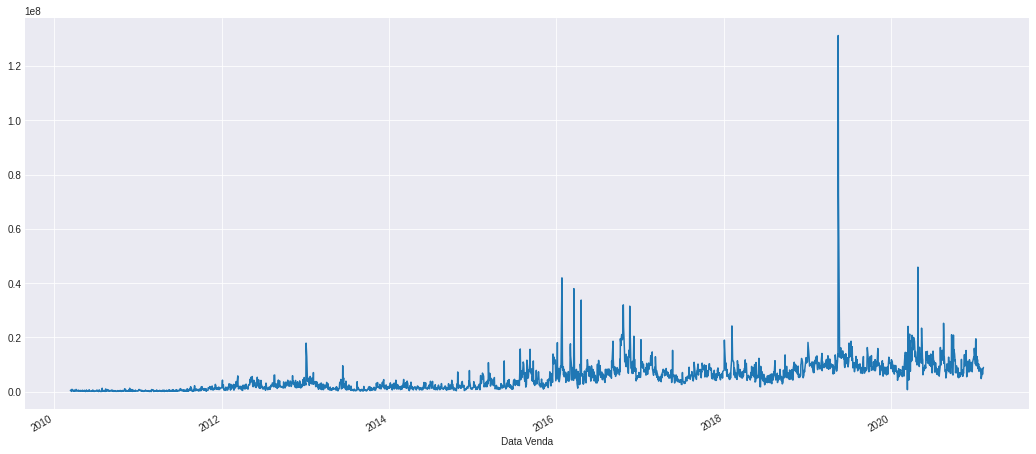

In [ ]:
vendasipca2035 = vendas.loc[('Tesouro IPCA+', '2035-05-15')]
vendasipca2035['Valor'].plot();

In [ ]:
#Obter as vendas dos títulos préfixados de 2018 a 2023
vendaspre2018 = vendas.loc[('Tesouro Prefixado', '2018-01-01')]
vendaspre2019 = vendas.loc[('Tesouro Prefixado', '2019-01-01')]
vendaspre2020 = vendas.loc[('Tesouro Prefixado', '2020-01-01')]
vendaspre2021 = vendas.loc[('Tesouro Prefixado', '2021-01-01')]
vendaspre2022 = vendas.loc[('Tesouro Prefixado', '2022-01-01')]
vendaspre2023 = vendas.loc[('Tesouro Prefixado', '2023-01-01')]

#FILTRAR as vendas de cada Título Prefixado de acordo com o tempo que o título foi vendido
vendaspre2018 = vendaspre2018[vendaspre2018.index >= '2016-01-01'] 
vendaspre2019 = vendaspre2019[vendaspre2019.index >= '2016-01-28'] 
vendaspre2020 = vendaspre2020[vendaspre2020.index >= '2017-02-10'] 
vendaspre2021 = vendaspre2021[vendaspre2021.index >= '2018-02-08'] 
vendaspre2022 = vendaspre2022[vendaspre2022.index >= '2019-02-04'] 
vendaspre2023 = vendaspre2023[vendaspre2023.index >= '2020-02-11'] 
vendaspre2023 = vendaspre2023[vendaspre2023.index <= '2020-12-31'] 

vendaspre2018a2023 = pd.concat([vendaspre2018,vendaspre2019,vendaspre2020,vendaspre2021,vendaspre2022,vendaspre2023])



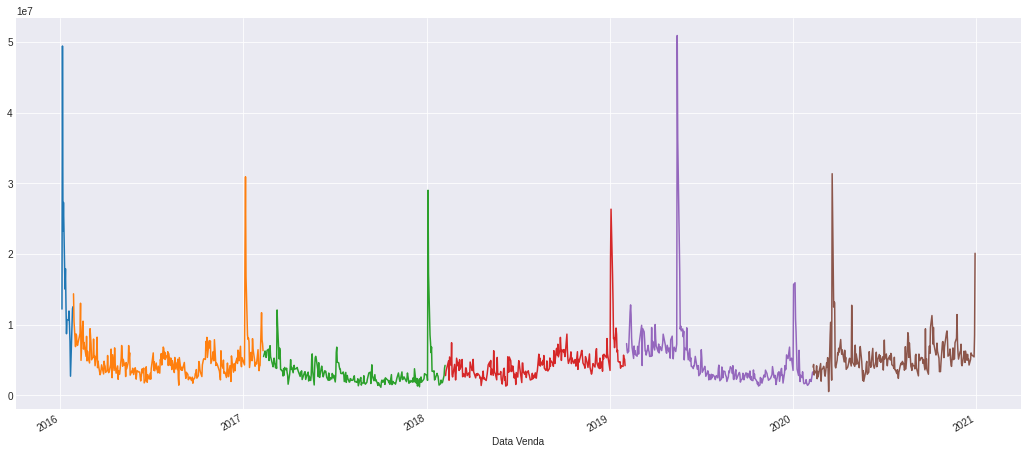

In [ ]:
#Plotar as vendas de títulos PréFixados de CurtoPrazo
vendaspre2018['Valor'].plot();
vendaspre2019['Valor'].plot();
vendaspre2020['Valor'].plot();
vendaspre2021['Valor'].plot();
vendaspre2022['Valor'].plot();
vendaspre2023['Valor'].plot();

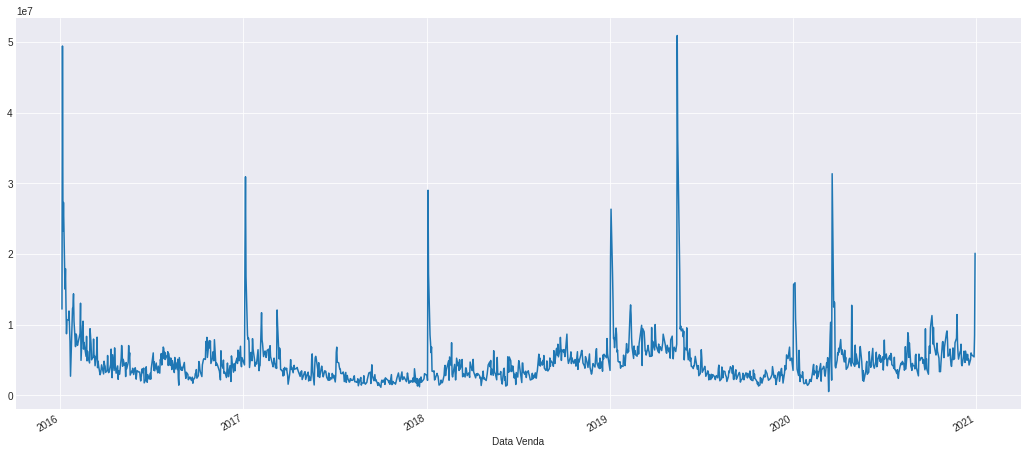

In [ ]:
vendaspre2018a2023['Valor'].plot();

Data Venda
2016-02-01     4255740.91
2016-02-02     3136447.10
2016-02-03     3243887.37
2016-02-04     2655666.72
2016-02-05     1809664.45
2016-02-10     2073709.22
2016-02-11     4279873.05
2016-02-12     1848999.79
2016-02-15     3707373.94
2016-02-16     4506394.46
                 ...     
2021-01-26    11174958.42
2021-01-27    12194549.86
2021-01-28     8123029.02
2021-01-29     6964775.11
2021-02-01     8387498.67
2021-02-02     9252204.21
2021-02-03     8764078.23
2021-02-04     6722529.11
2021-02-05     8215456.57
2021-02-08     7243426.59
Name: Valor, Length: 746, dtype: float64

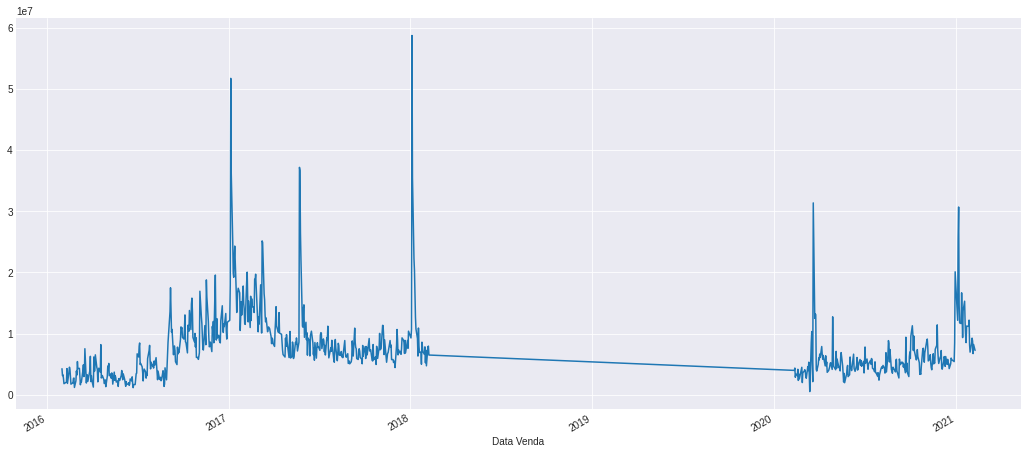

In [ ]:
#filtrar os valores dos títulos do tesouro direto após '2016-02-01'
vendasipca2035 = vendasipca2035[vendasipca2035.index >= '2016-02-01'] 
vendaspre2018a2023 = vendaspre2018a2023[vendaspre2018a2023.index >= '2016-02-01'] 
vendasselic2021 = vendasselic2021[vendasselic2021.index >= '2016-02-01'] 

In [ ]:
df = remove_outlier(vendaspre2018a2023,"Valor")
df.head()
df.shape



(1173, 3)

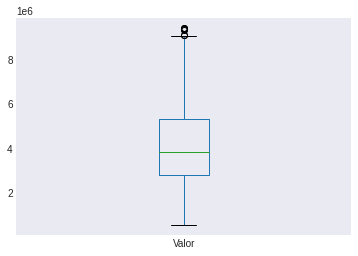

In [ ]:
plotar_boxplot(df,'Valor')

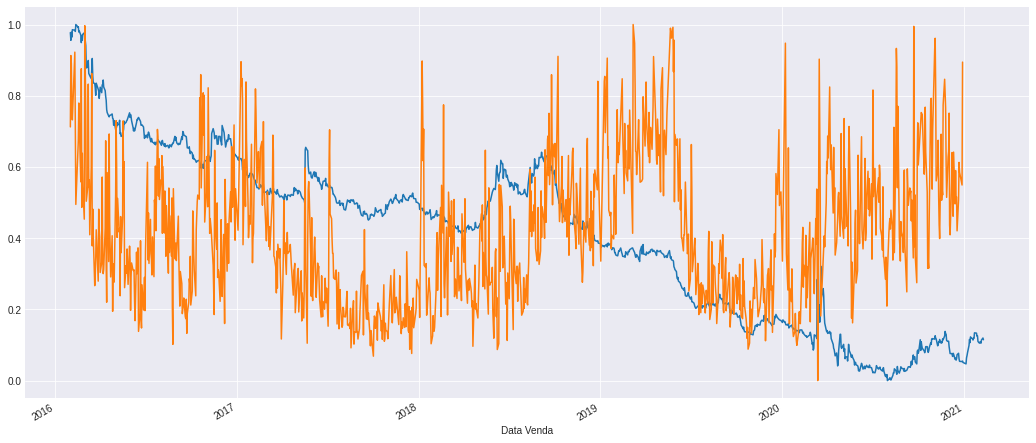

In [ ]:
plotar_grafico_taxa_vendas_normalizado(pre2023,df)

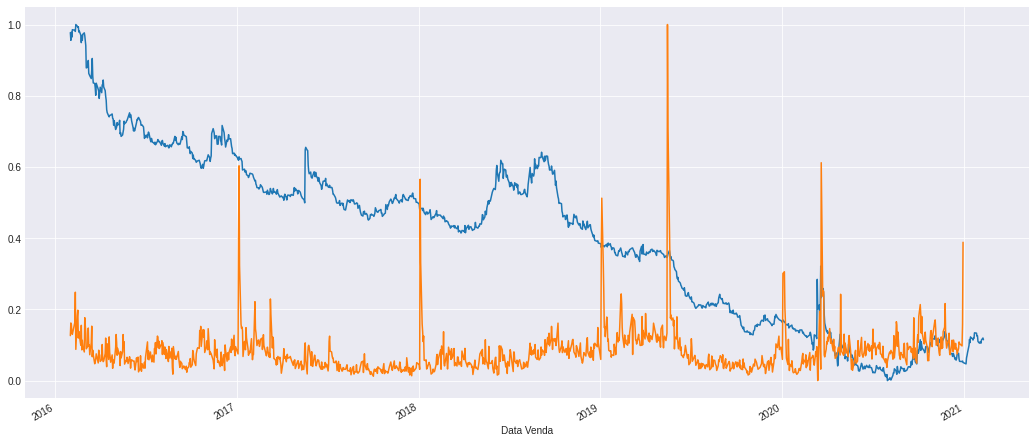

In [ ]:
plotar_grafico_taxa_vendas_normalizado(pre2023,vendaspre2018a2023)

In [ ]:
df = remove_outlier(vendasipca2035,"Valor")
df.head()
df.shape

(1191, 3)

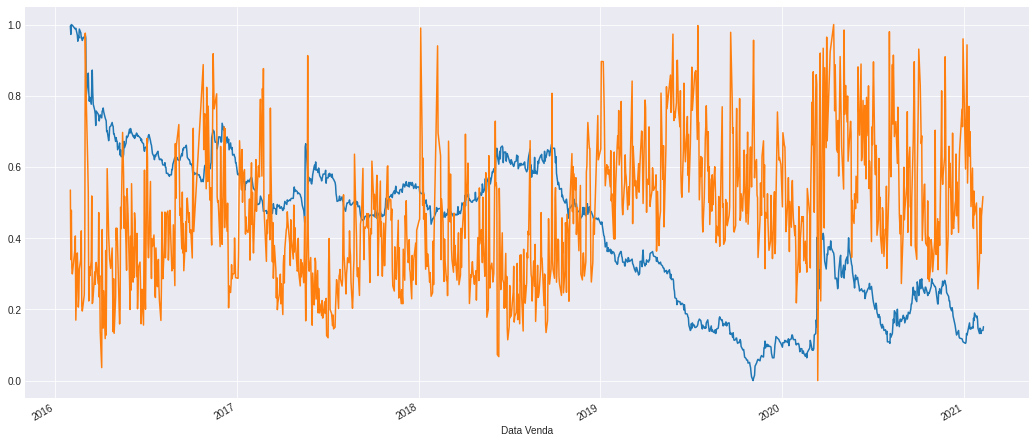

In [ ]:
plotar_grafico_taxa_vendas_normalizado(ipca2035,df)

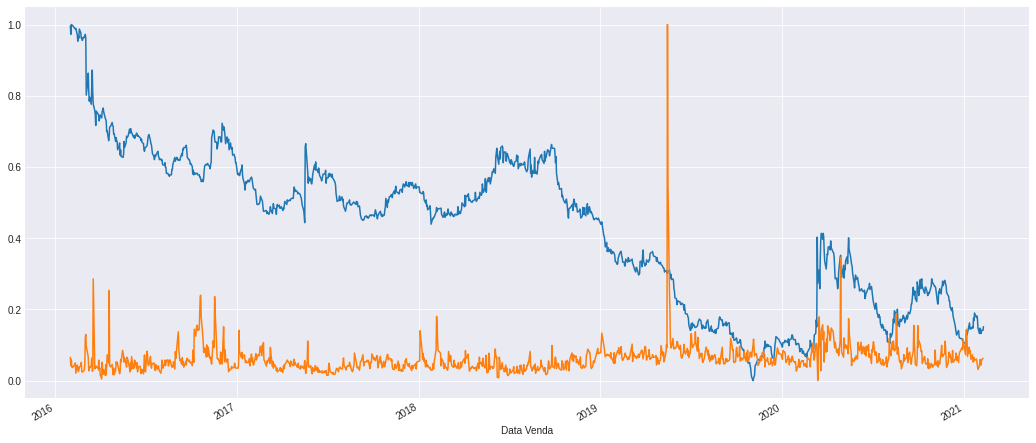

In [ ]:
plotar_grafico_taxa_vendas_normalizado(ipca2035,vendasipca2035)

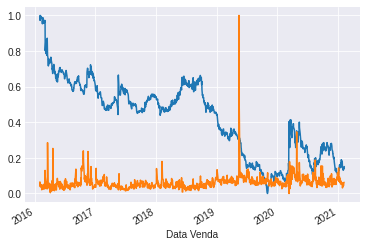

In [ ]:
((ipca2035['Taxa Venda Manha'] - ipca2035['Taxa Venda Manha'].min())/(ipca2035['Taxa Venda Manha'].max()-ipca2035['Taxa Venda Manha'].min())).plot();
((vendasipca2035['Valor'] - vendasipca2035['Valor'].min())/(vendasipca2035['Valor'].max()-vendasipca2035['Valor'].min())).plot();

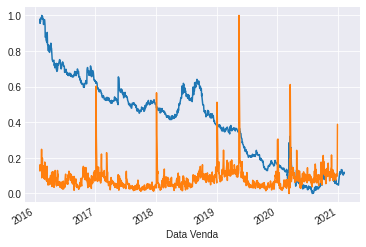

In [ ]:
#Verificar para obter a taxa dos titulos prefixados de 2018 a 2023, de acordo com o período em que foram vendidos
((pre2023['Taxa Venda Manha'] - pre2023['Taxa Venda Manha'].min())/(pre2023['Taxa Venda Manha'].max()-pre2023['Taxa Venda Manha'].min())).plot();
((vendaspre2018a2023['Valor'] - vendaspre2018a2023['Valor'].min())/(vendaspre2018a2023['Valor'].max()-vendaspre2018a2023['Valor'].min())).plot();



##4. Recompras Tesouro Direto

Esse conjunto da dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo.

###4.1 Buscando Dados

In [ ]:
recompras = busca_recompras_tesouro()

In [ ]:
recompras.sort_index(inplace=True)
recompras

Quantidade        Valor
Tipo Titulo                        Vencimento do Titulo Data Resgate                         
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00      3545.04
                                                        2005-02-03          1.00      1783.97
                                                        2005-03-03          2.00      3595.96
                                                        2005-03-10          1.00      1803.81
                                                        2005-03-24          0.20       364.14
                                                        2005-03-31          0.60      1098.15
                                                        2005-04-14          3.60      6666.62
                                                        2005-04-22         36.00     66912.84
                                                        2005-06-02          6.40     11999.94
                                   2005-12-01           2005-01-06        141.20    249321.07
...                                                                          ...          ...
Tesouro Selic                      2025-03-01           2020-05-07       1875.96  19870459.40
                                                        2020-05-08       3606.82  38208433.41
                                                        2020-05-11       2565.44  27179823.15
                                                        2020-05-12       2773.17  29383990.44
                                                        2020-05-13       2430.07  25751540.34
                                                        2020-05-14       2637.12  27948871.86
                                                        2020-05-15       2684.45  28453761.34
                                                        2020-05-18       1762.51  18683812.71
                                                        2020-05-19       2994.47  31747112.61
                                                        2020-05-20       1989.45  21094409.64

[38490 rows x 2 columns]

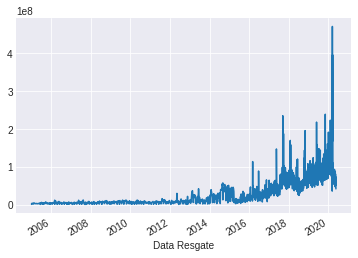

In [ ]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

###4.2 Recompras diárias Tesouro Selic 2025

In [ ]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01')]

In [ ]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [ ]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

In [ ]:
fig = px.bar(data_frame=recompras_selic_semanal,  x=recompras_selic_semanal.index, y='Valor' )
fig.show()

###4.3 Resgastes Tesouro Selic vs Índice Bovespa

In [ ]:
ibov = yf.download('^BVSP')['Adj Close'].resample('W').last().pct_change()[1:]

In [ ]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
Date,,
2019-02-24,0.236251,0.003691
2019-03-03,0.423072,-0.033529
2019-03-10,-0.219953,0.008044
2019-03-17,1.231367,0.039553
2019-03-24,0.179772,-0.054490
2019-03-31,0.579274,0.017923
2019-04-07,-0.185600,0.017744
2019-04-14,0.124599,-0.043591
2019-04-21,0.030708,0.018336


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [ ]:
selic_ibov.corr()

,Recompra(%),IBOV(%)
Recompra(%),1.000000,-0.309419
IBOV(%),-0.309419,1.000000
